In [1]:
import os
import pathlib
import sys
import socket
hostname = socket.gethostname()

abs_path = str(pathlib.Path(hostname).parent.absolute())
WORKDIR = abs_path[:- (len(abs_path.split('/')[-2] + abs_path.split('/')[-1])+1)]


if "mimi" in hostname:
    print(hostname)
    DATA_DIR = "/scratch/franzihe/"
    FIG_DIR = "/uio/kant/geo-geofag-u1/franzihe/Documents/Figures/Weathermaps/"

elif "glefsekaldt" in hostname: 
    DATA_DIR = "/home/franzihe/Data/"

INPUT_DATA_DIR = os.path.join(DATA_DIR, 'input')
# OUTPUT_DATA_DIR = os.path.join(DATA_DIR, 'output')
# UTILS_DIR = os.path.join(WORKDIR, 'utils')

# sys.path.append(UTILS_DIR)
# make figure directory
try:
    os.mkdir(FIG_DIR)
except OSError:
    pass

mimi.uio.no


## How to access the archived weather forecast

In [2]:


# import python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cy
from cmcrameri import cm
from matplotlib.dates import DateFormatter



## Andenes location


- Municipality: Andøy
- County: Nordland
- Station number (id): SN87110
- Height above mean sea level: 10 m
- Latitude: 69.3073º N
- Longitude: 16.1312º E
- Operating period: 01.01.1958 - now
- WMO number: 1010
- WIGOS number: 0-20000-0-01010
- Station holder: Met.no, Avinor

In [3]:
lat = 69.3073
lon = 16.1312

In [4]:
# Specify the file on the thredds server. For example the full file of latest forecast of the AROME Arctic weather model. 
# Note, at this point only metadata is retrieved

url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/02/22/meps_det_2_5km_20230222T09Z.nc'
# url = 'https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/02/22/meps_det_2_5km_20230222T12Z.nc'
dataset = xr.open_dataset(url, decode_times=True, )

## Plot forecast on map

In [5]:
timestep = 2

cb_alt = dataset['cloud_base_altitude'].isel(time=timestep,surface=0)
ct_alt = dataset['cloud_top_altitude'].isel(time=timestep,surface=0)
high_type_frac = dataset['high_type_cloud_area_fraction'].isel(time=timestep,height0=0)
med_type_frac = dataset['medium_type_cloud_area_fraction'].isel(time=timestep,height0=0)
low_type_frac =dataset['low_type_cloud_area_fraction'].isel(time=timestep,height0=0)

In [6]:
fig_label = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)']


/tmp/ipykernel_2177600/1417340304.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.15, w_pad=0.15, h_pad=0.15);


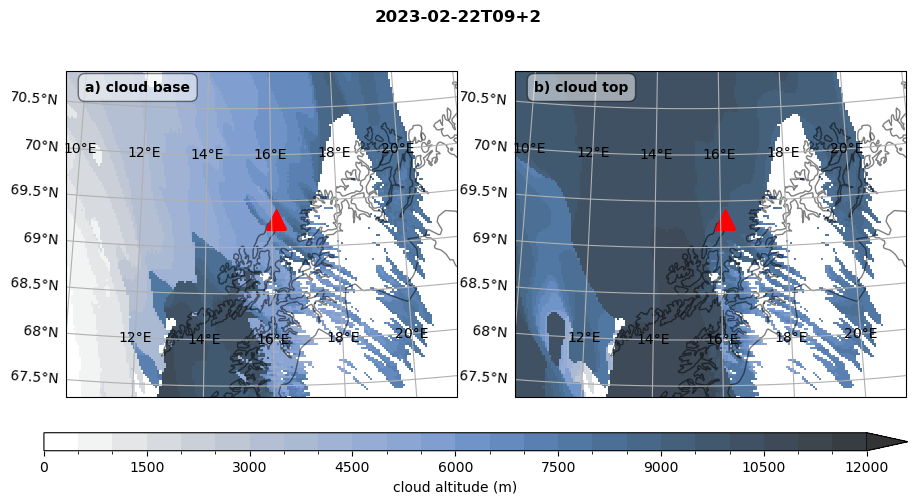

In [13]:

projection = cy.crs.LambertConformal(central_longitude =dataset.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =dataset.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = dataset.projection_lambert.standard_parallel)
# f, axsm = plt.subplots(2,2, subplot_kw={'projection' : projection}, sharex=True, sharey=True)
f, axsm = plt.subplots(1,2, subplot_kw={'projection' : projection}, sharex=True, sharey=True, figsize=[9,4.5])

ax = axsm.flatten()

cf = cb_alt.plot(ax=ax[0],cmap=cm.oslo_r,transform=projection, add_colorbar=False, extend='max', vmin=0,levels=np.arange(0,12500,500),alpha=0.8)
cl = ct_alt.plot(ax=ax[1], cmap=cm.oslo_r,transform=projection, add_colorbar=False, extend='max',vmin=0, levels=np.arange(0,12500,500),alpha=0.8)

for ax, title, k in zip(axsm.flatten(),['cloud base', 'cloud top',], range(len(fig_label))):
    ax.set_extent([lon - 6, lon + 5, lat-2, lat+1.5], cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False
    # ax.set(title =np.datetime_as_string(dataset.time.isel(time=timestep), unit='h'), )
    
    ax.set(title = '')
    
    ax.text(0.05, 0.95,
                        '{} {}'.format(fig_label[k], title),
                        fontweight='bold',
                        horizontalalignment='left',
                        verticalalignment='center',
                        transform = ax.transAxes,
                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.5',alpha=0.5))
    
    # Plot ANX station
    ax.plot(lon, lat, color='red', marker='^', transform=cy.crs.PlateCarree(), markersize=15)


cbaxes = f.add_axes([0.04, 0.0, 0.96, 0.04])
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='horizontal',label='{} ({})'.format('cloud altitude',cb_alt.attrs['units']))


f.suptitle('{}+{}'.format(np.datetime_as_string(dataset.time.isel(time=0), unit='h'), timestep), fontweight="bold");


plt.tight_layout(pad=0.15, w_pad=0.15, h_pad=0.15);

plt.savefig(FIG_DIR + 'cloud_base_top_altitude_{}.png'.format(np.datetime_as_string(dataset.time.isel(time=timestep), unit='h')), 
            format = 'png', bbox_inches = 'tight', transparent = False)

/tmp/ipykernel_2177600/719314387.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.15, w_pad=0.15, h_pad=0.15);


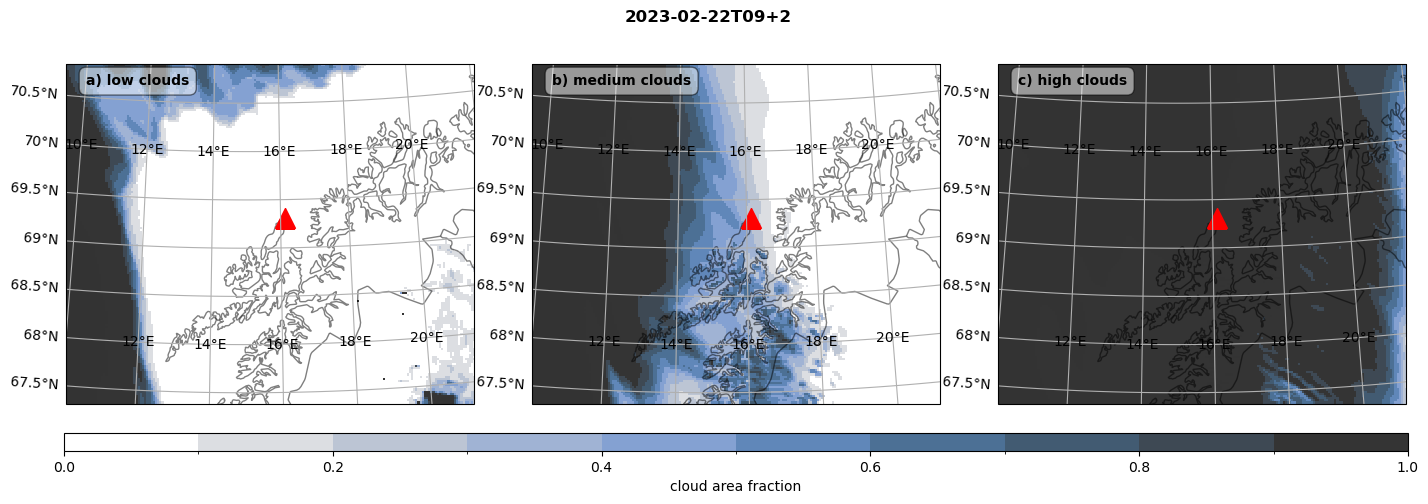

In [14]:

projection = cy.crs.LambertConformal(central_longitude =dataset.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =dataset.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = dataset.projection_lambert.standard_parallel)
f, axsm = plt.subplots(1,3, subplot_kw={'projection' : projection}, sharex=True, sharey=True,figsize=[14,4.5])
# f, ax = plt.subplots(subplot_kw={'projection' : projection}, sharex=True, sharey=True)

ax = axsm.flatten()

low_type_frac.plot(ax =ax[0],cmap=cm.oslo_r,transform=projection, add_colorbar=False,vmin=0,levels=np.arange(0,1.1,0.1), alpha=0.8)
med_type_frac.plot(ax =ax[1],cmap=cm.oslo_r,transform=projection, add_colorbar=False,vmin=0,levels=np.arange(0,1.1,0.1), alpha=0.8)
cf = high_type_frac.plot(ax =ax[2],cmap=cm.oslo_r,transform=projection, add_colorbar=False,vmin=0,levels=np.arange(0,1.1,0.1), alpha=0.8)

for ax, title, k in zip(axsm.flatten(),['low clouds', 'medium clouds', 'high clouds'], range(len(fig_label))):
    ax.set_extent([lon - 6, lon + 5, lat-2, lat+1.5], cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False
    # ax.set(title = title)
    ax.set(title = '')
    
    ax.text(0.05, 0.95,
                        '{} {}'.format(fig_label[k], title),
                        fontweight='bold',
                        horizontalalignment='left',
                        verticalalignment='center',
                        transform = ax.transAxes,
                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.5',alpha=0.5))
    
    # Plot ANX station
    ax.plot(lon, lat, color='red', marker='^', transform=cy.crs.PlateCarree(), markersize=15)
    
cbaxes = f.add_axes([0.04, 0.0, 0.96, 0.04])
# [0.95, 0.025, 0.025, 0.9]
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='horizontal',label='{}'.format('cloud area fraction',))

f.suptitle('{}+{}'.format(np.datetime_as_string(dataset.time.isel(time=0), unit='h'), timestep), fontweight="bold");



plt.tight_layout(pad=0.15, w_pad=0.15, h_pad=0.15);

plt.savefig(FIG_DIR + 'cloud_area_fraction_{}.png'.format(np.datetime_as_string(dataset.time.isel(time=timestep), unit='h')), 
            format = 'png', bbox_inches = 'tight', transparent = False)